# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import ttest_1samp

import seaborn as sns

In [7]:
# your-code

df = pd.read_csv('../../../data/activity_pretest.csv')
df.info() # con un total de 1.860.000 de filas y 3 columnas siendo 1 de ellas de números.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   activity_level  int64 
dtypes: int64(1), object(2)
memory usage: 42.6+ MB


,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0


In [3]:
#convertimos nuestra columna dt en formato datetime
df['dt'] = pd.to_datetime(df['dt'])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   userid          object        
 1   dt              datetime64[ns]
 2   activity_level  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 42.6+ MB


,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0


In [5]:
df.groupby(by='dt').describe()

activity_level                                                
                    count      mean       std  min  25%  50%    75%   max
dt                                                                       
2021-10-01        60000.0  5.241417  6.523111  0.0  0.0  1.0  10.00  20.0
2021-10-02        60000.0  5.266517  6.526551  0.0  0.0  1.0  11.00  20.0
2021-10-03        60000.0  5.246300  6.509678  0.0  0.0  1.0  10.00  20.0
2021-10-04        60000.0  5.246950  6.531706  0.0  0.0  1.0  10.25  20.0
2021-10-05        60000.0  5.233433  6.524065  0.0  0.0  1.0  10.00  20.0
2021-10-06        60000.0  5.218100  6.510615  0.0  0.0  1.0  10.00  20.0
2021-10-07        60000.0  5.232067  6.510775  0.0  0.0  1.0  10.00  20.0
2021-10-08        60000.0  5.251633  6.533878  0.0  0.0  1.0  11.00  20.0
2021-10-09        60000.0  5.287583  6.535382  0.0  0.0  1.0  11.00  20.0
2021-10-10        60000.0  5.242200  6.528365  0.0  0.0  1.0  11.00  20.0
2021-10-11        60000.0  5.190167  6.491718  0.0  0.0  1.0  10.00  20.0
2021-10-12        60000.0  5.253917  6.523418  0.0  0.0  1.0  11.00  20.0
2021-10-13        60000.0  5.265750  6.525415  0.0  0.0  1.0  10.00  20.0
2021-10-14        60000.0  5.210433  6.482642  0.0  0.0  1.0  10.00  20.0
2021-10-15        60000.0  5.245633  6.527713  0.0  0.0  1.0  10.00  20.0
2021-10-16        60000.0  5.249633  6.524203  0.0  0.0  1.0  10.00  20.0
2021-10-17        60000.0  5.253167  6.529419  0.0  0.0  1.0  10.00  20.0
2021-10-18        60000.0  5.232333  6.519062  0.0  0.0  1.0  10.00  20.0
2021-10-19        60000.0  5.210533  6.510139  0.0  0.0  1.0  10.00  20.0
2021-10-20        60000.0  5.250883  6.517736  0.0  0.0  1.0  10.00  20.0
2021-10-21        60000.0  5.256950  6.517223  0.0  0.0  1.0  11.00  20.0
2021-10-22        60000.0  5.247583  6.542156  0.0  0.0  1.0  10.00  20.0
2021-10-23        60000.0  5.256183  6.529170  0.0  0.0  1.0  10.00  20.0
2021-10-24        60000.0  5.271233  6.526322  0.0  0.0  1.0  11.00  20.0
2021-10-25        60000.0  5.265233  6.555924  0.0  0.0  1.0  11.00  20.0
2021-10-26        60000.0  5.240900  6.519725  0.0  0.0  1.0  10.00  20.0
2021-10-27        60000.0  5.261283  6.540412  0.0  0.0  1.0  11.00  20.0
2021-10-28        60000.0  5.206800  6.487321  0.0  0.0  1.0  10.00  20.0
2021-10-29        60000.0  5.258433  6.521331  0.0  0.0  1.0  10.00  20.0
2021-10-30        60000.0  5.227067  6.510249  0.0  0.0  1.0  10.00  20.0
2021-10-31        60000.0  5.221650  6.515494  0.0  0.0  1.0  10.00  20.0

In [6]:
print('Usuarios únicos:', df['userid'].nunique()) # Tiene 60.000 usuarios únicos
print('Período de tiempo en días es de:', df['dt'].nunique()) # Período de tiempo es de 31 días
print('Niveles de actividad:', df['activity_level'].nunique()-1) # 21 niveles de actividad pero no habría que contemplar los 0.
df['activity_level'].unique()

Usuarios únicos: 60000
Período de tiempo en días es de: 31
Niveles de actividad: 20


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [7]:
# Número de usuarios por cada nivel de actividad
df_act = df.groupby('activity_level')['userid'].agg(['count', 'max', 'min'])
df_act

#df_act['max'].nunique() # que tan solo 4 diferentes usuarios sostienen la máximas apariciones en todos los niveles de acti.
# y que el mismo usuario que más aparece en actividad 0 es el que más veces aparece en muchas del resto de categorías 
# suponemos que debido a que ese métrica está condicionada a día en el que se conecta o no.

,count,max,min
activity_level,,,
0,909125,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
1,48732,ffff4881-db48-4836-b669-676f3bb5a761,0004c8bb-df77-43b2-a93c-7398e9bc5175
2,49074,fffb68bd-be7f-48e4-80bb-41f7354983ca,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
3,48659,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
4,48556,ffff4881-db48-4836-b669-676f3bb5a761,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a
5,49227,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
6,48901,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
7,48339,ffff4881-db48-4836-b669-676f3bb5a761,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a
8,48396,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc


In [8]:
df_act = df_act.drop(0)

In [9]:
df_act.reset_index()

,activity_level,count,max,min
0,1,48732,ffff4881-db48-4836-b669-676f3bb5a761,0004c8bb-df77-43b2-a93c-7398e9bc5175
1,2,49074,fffb68bd-be7f-48e4-80bb-41f7354983ca,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
2,3,48659,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
3,4,48556,ffff4881-db48-4836-b669-676f3bb5a761,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a
4,5,49227,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
5,6,48901,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
6,7,48339,ffff4881-db48-4836-b669-676f3bb5a761,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a
7,8,48396,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc
8,9,48820,ffff4881-db48-4836-b669-676f3bb5a761,00051943-ca03-49d2-aafc-138439e5459c
9,10,48943,ffff4881-db48-4836-b669-676f3bb5a761,0002a1ca-0b76-41cd-91e6-9aa51947b7fc


In [10]:
df_act['count'].mean()
# podemos ver que de los 20 niveles de activdad, 19 de ellos se encuentran concentrados alrededor de la media mientras
# que el nivel más alto de actividad es prácticamente la mitad. Puede que los criterios de exigencia a la hora de valorar
# dicho nivel de actividad sean muy altos.

47543.75

In [11]:
# How many activity levels do you have per day.
df.groupby('dt').nunique() # cada día se dan todos los niveles de actividad.

,userid,activity_level
dt,,
2021-10-01,60000,21
2021-10-02,60000,21
2021-10-03,60000,21
2021-10-04,60000,21
2021-10-05,60000,21
2021-10-06,60000,21
2021-10-07,60000,21
2021-10-08,60000,21
2021-10-09,60000,21


In [12]:
# Número de records en cada día según el nivel de actividad.
df.groupby(['dt', 'activity_level'], as_index=False).agg(records=('userid', 'count'))

,dt,activity_level,records
0,2021-10-01,0,29366
1,2021-10-01,1,1602
2,2021-10-01,2,1507
3,2021-10-01,3,1587
4,2021-10-01,4,1551
...,...,...,...
646,2021-10-31,16,1499
647,2021-10-31,17,1534
648,2021-10-31,18,1531
649,2021-10-31,19,1616


### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testinG.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [13]:
# your-code

df.groupby('dt').count()

# aqui hay que eliminar aquellos con actividad cero.

,userid,activity_level
dt,,
2021-10-01,60000,60000
2021-10-02,60000,60000
2021-10-03,60000,60000
2021-10-04,60000,60000
2021-10-05,60000,60000
2021-10-06,60000,60000
2021-10-07,60000,60000
2021-10-08,60000,60000
2021-10-09,60000,60000


In [14]:
df.drop(df[df['activity_level'] == 0].index, inplace = True)
df

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [15]:
# aquí tendríamos nuestros DAU que vienen a ser la mitad de los usuarios si se contemplasen los de actividad cero.
df.groupby('dt')['userid'].count()

dt
2021-10-01    30634
2021-10-02    30775
2021-10-03    30785
2021-10-04    30599
2021-10-05    30588
2021-10-06    30639
2021-10-07    30637
2021-10-08    30600
2021-10-09    30902
2021-10-10    30581
2021-10-11    30489
2021-10-12    30715
2021-10-13    30761
2021-10-14    30716
2021-10-15    30637
2021-10-16    30708
2021-10-17    30741
2021-10-18    30694
2021-10-19    30587
2021-10-20    30795
2021-10-21    30705
2021-10-22    30573
2021-10-23    30645
2021-10-24    30815
2021-10-25    30616
2021-10-26    30673
2021-10-27    30661
2021-10-28    30734
2021-10-29    30723
2021-10-30    30628
2021-10-31    30519
Name: userid, dtype: int64

### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [16]:
# your-code
df = pd.read_csv('./data/ctr_pretest.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950875 entries, 0 to 950874
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userid  950875 non-null  object 
 1   dt      950875 non-null  object 
 2   ctr     950875 non-null  float64
dtypes: float64(1), object(2)
memory usage: 21.8+ MB


,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04


In [17]:
#Convertimos la columna fecha en el formadto datetime
df['dt'] = pd.to_datetime(df['dt'])

In [18]:
df.groupby(by='dt').describe()

ctr                                                       
              count       mean       std   min    25%    50%     75%   max
dt                                                                        
2021-10-01  30634.0  32.993446  1.736421  30.0  31.48  32.99  34.510  36.0
2021-10-02  30775.0  32.991664  1.735812  30.0  31.48  32.99  34.490  36.0
2021-10-03  30785.0  32.995086  1.731520  30.0  31.50  32.99  34.500  36.0
2021-10-04  30599.0  32.992995  1.734027  30.0  31.49  32.98  34.505  36.0
2021-10-05  30588.0  33.004375  1.733007  30.0  31.51  33.01  34.500  36.0
2021-10-06  30639.0  33.018564  1.723247  30.0  31.54  33.04  34.500  36.0
2021-10-07  30637.0  32.988500  1.733208  30.0  31.49  32.98  34.490  36.0
2021-10-08  30600.0  32.998654  1.728809  30.0  31.51  33.00  34.490  36.0
2021-10-09  30902.0  33.005082  1.734601  30.0  31.50  33.00  34.520  36.0
2021-10-10  30581.0  33.007134  1.728713  30.0  31.50  33.02  34.500  36.0
2021-10-11  30489.0  32.990300  1.728365  30.0  31.50  32.98  34.480  36.0
2021-10-12  30715.0  32.996166  1.728772  30.0  31.51  32.99  34.480  36.0
2021-10-13  30761.0  32.984248  1.731336  30.0  31.48  32.97  34.480  36.0
2021-10-14  30716.0  32.999878  1.740181  30.0  31.48  33.00  34.510  36.0
2021-10-15  30637.0  33.008517  1.727134  30.0  31.52  33.01  34.500  36.0
2021-10-16  30708.0  32.991025  1.732078  30.0  31.48  33.00  34.490  36.0
2021-10-17  30741.0  33.001919  1.730169  30.0  31.50  33.00  34.490  36.0
2021-10-18  30694.0  33.007763  1.730381  30.0  31.51  33.01  34.490  36.0
2021-10-19  30587.0  33.001511  1.728406  30.0  31.51  32.99  34.500  36.0
2021-10-20  30795.0  33.004632  1.735137  30.0  31.48  33.02  34.510  36.0
2021-10-21  30705.0  32.997566  1.735778  30.0  31.49  32.99  34.510  36.0
2021-10-22  30573.0  33.006785  1.731619  30.0  31.50  33.02  34.500  36.0
2021-10-23  30645.0  33.012228  1.730102  30.0  31.51  33.02  34.510  36.0
2021-10-24  30815.0  32.984093  1.733231  30.0  31.47  32.98  34.490  36.0
2021-10-25  30616.0  32.990223  1.730431  30.0  31.49  32.99  34.490  36.0
2021-10-26  30673.0  33.014248  1.724214  30.0  31.53  33.02  34.500  36.0
2021-10-27  30661.0  33.007045  1.728927  30.0  31.51  33.01  34.520  36.0
2021-10-28  30734.0  33.005711  1.728195  30.0  31.51  33.02  34.500  36.0
2021-10-29  30723.0  33.004230  1.735600  30.0  31.50  33.01  34.520  36.0
2021-10-30  30628.0  33.016430  1.734539  30.0  31.51  33.03  34.530  36.0
2021-10-31  30519.0  32.987515  1.737894  30.0  31.48  32.97  34.500  36.0

In [19]:
# La media de CTR al día sería:
df_ctr = df.groupby('dt', as_index=False).agg(ctr_average=('ctr', 'mean'))
df_ctr

,dt,ctr_average
0,2021-10-01,32.993446
1,2021-10-02,32.991664
2,2021-10-03,32.995086
3,2021-10-04,32.992995
4,2021-10-05,33.004375
5,2021-10-06,33.018564
6,2021-10-07,32.988500
7,2021-10-08,32.998654
8,2021-10-09,33.005082
9,2021-10-10,33.007134


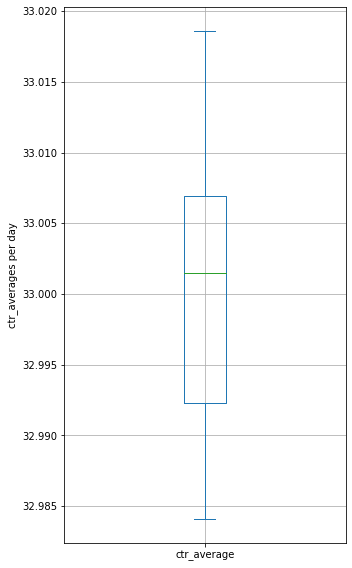

In [20]:
data = df_ctr['ctr_average']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('ctr_averages per day')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()

In [21]:
ctr_range = df_ctr['ctr_average'].max() - df_ctr['ctr_average'].min()
print('ctr_average range:', round(ctr_range, 3), ', siendo su mínimo:', round(df_ctr['ctr_average'].min(), 3), 'y su máximo:', 
          round(df_ctr['ctr_average'].max(), 3))
print('El range del ctr_average supone el', round((ctr_range/df_ctr['ctr_average'].mean())*100, 3), '% sobre su media')

ctr_average range: 0.034 , siendo su mínimo: 32.984 y su máximo: 33.019
El range del ctr_average supone el 0.104 % sobre su media


### Insigth

In [22]:
# es tan pequeña la desviación en el rango que se podría interpretar que la media de click en los anuncios es independiente
# al día de la semana.

---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

### Calculamos primero Activity level tanto de grupo 0 como de 1

In [23]:
# your-code

df_aa = pd.read_csv('./data/activity_all.csv')
df_aa.info()
df_aa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660000 entries, 0 to 3659999
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   groupid         int64 
 3   activity_level  int64 
dtypes: int64(2), object(2)
memory usage: 111.7+ MB


,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0


In [24]:
df_aa['dt'] = pd.to_datetime(df_aa['dt'])

In [25]:
df_aa.groupby('groupid').describe()
# aquí se está teniendo en cuenta ya sean anterior o posterior a la fecha 1 de Noviembre por lo que habría que filtrar
# por la fecha primero.

activity_level                                               
                 count      mean       std  min  25%  50%   75%   max
groupid                                                              
0            1827011.0  5.322640  6.538584  0.0  0.0  1.0  11.0  20.0
1            1832989.0  7.579649  6.613666  0.0  0.0  7.0  13.0  20.0

In [26]:
df_aa = df_aa[df_aa['dt'] < '2021-11-01']
df_aa

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20
3625442,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,0,20


In [27]:
df_aa.groupby('groupid').describe()
# aquí podemos comprobar que ahora tanto el grupo de control como la muestra a analizar tienen prácticamente los mismos 
# parámetros, cosa que tiene todo el sentido.

activity_level                                               
                 count      mean       std  min  25%  50%   75%   max
groupid                                                              
0             928481.0  5.245635  6.521184  0.0  0.0  1.0  10.0  20.0
1             931519.0  5.240952  6.520811  0.0  0.0  1.0  10.0  20.0

### Grupo 0 de Actividad anterior a la fecha

In [28]:
df_aa_0 = df_aa[(df_aa['groupid'] == 0) & (df_aa['activity_level'] != 0) & (df_aa['dt'] < '2021-11-01')]
df_aa_0

,userid,dt,groupid,activity_level
1356595,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,0,1
1356597,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,0,1
1356598,420a60e9-6394-4324-b02c-ab372609968e,2021-10-01,0,1
1356599,6f6b36ef-bd93-4399-a2f4-996c96d3e0a7,2021-10-01,0,1
1356600,7dfbbc2e-6e71-4128-848d-be83df79b921,2021-10-01,0,1
...,...,...,...,...
3625427,2ffce3bd-f7c6-4752-9141-ad887eea6938,2021-10-31,0,20
3625429,1a0dc2cf-c05a-40ad-86b8-d24809295ee2,2021-10-31,0,20
3625430,59f581ac-ff18-40f7-8253-cd8e7612bded,2021-10-31,0,20
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20


In [29]:
df_aa_0.groupby('groupid').describe()
# Aquí ya vemos que una vez eliminados los registros de nivel de actividad 0, suben considerablemente las métricas.
# Hemos considerado eliminar los niveles de actividad 0 puesto que al ser usuarios que no interactúan con la aplicación,
# tampoco estarán expuestos a los cambios realizados y no tendremos su feedback.

activity_level                                                 
                 count       mean       std  min  25%   50%   75%   max
groupid                                                                
0             474947.0  10.254769  5.636209  1.0  5.0  10.0  15.0  20.0

In [30]:
print('Usuarios únicos:', df_aa_0['userid'].nunique()) 
print('Período de tiempo en días es de:', df_aa_0['dt'].nunique()) 
print('Niveles de actividad:', df_aa_0['activity_level'].nunique())

Usuarios únicos: 29951
Período de tiempo en días es de: 31
Niveles de actividad: 20


In [31]:
df_aa_0.groupby('dt')['userid'].count()

dt
2021-10-01    15337
2021-10-02    15354
2021-10-03    15423
2021-10-04    15211
2021-10-05    15126
2021-10-06    15335
2021-10-07    15346
2021-10-08    15357
2021-10-09    15371
2021-10-10    15277
2021-10-11    15226
2021-10-12    15290
2021-10-13    15334
2021-10-14    15295
2021-10-15    15277
2021-10-16    15348
2021-10-17    15430
2021-10-18    15244
2021-10-19    15303
2021-10-20    15382
2021-10-21    15431
2021-10-22    15356
2021-10-23    15151
2021-10-24    15512
2021-10-25    15351
2021-10-26    15280
2021-10-27    15459
2021-10-28    15434
2021-10-29    15214
2021-10-30    15285
2021-10-31    15208
Name: userid, dtype: int64

### Grupo 1 de Actividad anterior a la fecha

In [32]:
df_aa_1 = df_aa[(df_aa['groupid'] == 1) & (df_aa['activity_level'] != 0) & (df_aa['dt'] < '2021-11-01')]
df_aa_1

,userid,dt,groupid,activity_level
1356592,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1,1
1356593,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1,1
1356594,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1,1
1356596,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1,1
1356602,75d936e5-257e-4b78-a7b3-96acb30ce6c1,2021-10-01,1,1
...,...,...,...,...
3625437,93179304-6690-4932-bb68-6db1a18c747a,2021-10-31,1,20
3625438,a2551ab2-abd6-46a1-9f05-e9d2318ddf35,2021-10-31,1,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20


In [33]:
df_aa_1.groupby('groupid').describe()
# como era de esperar sucede los mismo que en el caso anterior.

activity_level                                                 
                 count       mean       std  min  25%   50%   75%   max
groupid                                                                
1             475928.0  10.257951  5.635674  1.0  5.0  10.0  15.0  20.0

In [34]:
print('Usuarios únicos:', df_aa_1['userid'].nunique()) 
print('Período de tiempo en días es de:', df_aa_1['dt'].nunique()) 
print('Niveles de actividad:', df_aa_1['activity_level'].nunique())

Usuarios únicos: 30049
Período de tiempo en días es de: 31
Niveles de actividad: 20


In [35]:
df_aa_1.groupby('dt')['userid'].count()

dt
2021-10-01    15297
2021-10-02    15421
2021-10-03    15362
2021-10-04    15388
2021-10-05    15462
2021-10-06    15304
2021-10-07    15291
2021-10-08    15243
2021-10-09    15531
2021-10-10    15304
2021-10-11    15263
2021-10-12    15425
2021-10-13    15427
2021-10-14    15421
2021-10-15    15360
2021-10-16    15360
2021-10-17    15311
2021-10-18    15450
2021-10-19    15284
2021-10-20    15413
2021-10-21    15274
2021-10-22    15217
2021-10-23    15494
2021-10-24    15303
2021-10-25    15265
2021-10-26    15393
2021-10-27    15202
2021-10-28    15300
2021-10-29    15509
2021-10-30    15343
2021-10-31    15311
Name: userid, dtype: int64

In [36]:
Z_score, p_value = ztest(df_aa_0['activity_level'], df_aa_1['activity_level'])

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

# Calculamos una puntuación z y el Pvalor para que nos indiquen que podemos rechazar la hipótesis nula, 
# esto supondría que en lugar de un patrón aleatorio,
# sus entidades (o los valores asociados con las entidades) exhiben clusterig o dispersión estadísticamente significativa.
# El P valor es la probabilidad de error de aceptar la hipótesis como cierta y que en realidad sea falsa.
# Cuando el valor p es muy pequeño, significa que es muy poco probable (pequeña probabilidad) que el patrón espacial observado
# sea el resultado de procesos aleatorios, por lo tanto puede rechazar la hipótesis nula.
# Qué es pequeño o no del P Valor? aquel número que se encuentre por encima o debajo del nivel de significancia o alfa.
# eso es, para un intervalo de confianza del 95%, su alfa es el 5%. Por debajo del 5%, el P Valor nos indica que podríamos
# rechazar la hipótesis nula (igualdad entre las muestras) con vista a aceptar la H1 (diferencia significativa)

Z_score: -0.27521370941856227 
p-value: 0.7831520549245693


En este caso, con un P Valor muy por encima del 5% de significancia, nos invita a aceptar la hipótesis nula, donde 
ambas muestras no tienen diferencia, por lo que son similares.

### Análisis resumido para el CTR previo a la fecha indicada

In [37]:
df_ca = pd.read_csv('./data/ctr_all.csv')
#df_aa.info()
#df_aa.head()

In [38]:
df_ca['dt'] = pd.to_datetime(df_ca['dt'])

In [39]:
df_ca.groupby('groupid').describe()
# aquí se está teniendo en cuenta ya sean anterior o posterior a la fecha 1 de Noviembre por lo que habría que filtrar
# por la fecha primero.

ctr                                                      
             count       mean       std   min    25%    50%    75%   max
groupid                                                                 
0         948407.0  32.998948  1.733451  30.0  31.50  33.00  34.50  36.0
1        1355001.0  36.241686  2.947645  30.0  34.27  36.37  38.68  41.0

In [42]:
df_ca_0 = df_ca[(df_ca['groupid'] == 0) & (df_ca['dt'] < '2021-11-01')]
df_ca_1 = df_ca[(df_ca['groupid'] == 1) & (df_ca['dt'] < '2021-11-01')]

In [43]:
Z_score, p_value = ztest(df_ca_0['ctr'], df_ca_1['ctr'])

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 0.3775817380268587 
p-value: 0.7057413330705573


En este caso, con un P Valor muy por encima del 5% de significancia, nos invita a aceptar la hipótesis nula, donde 
ambas muestras no tienen diferencia, por lo que son similares.

In [44]:
T_score, p_value = ttest_1samp(df_ca_0['ctr'],df_ca_1['ctr'])
print(f'T_score: {T_score}', f'\np-value: {p_value}')

T_score: 824040      688.056124
824041      326.321506
824042      715.881864
824043      719.856970
824044    -1041.114856
              ...     
1759573     266.694920
1759574    1157.118597
1759575   -1076.890807
1759576    -699.255766
1759577     831.159930
Name: ctr, Length: 475928, dtype: float64 
p-value: [0. 0. 0. ... 0. 0. 0.]


---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

### Análisis Actividad

In [55]:
# your-code
df_aa = pd.read_csv('./data/activity_all.csv')
df_ad_0 = df_aa[(df_aa['groupid'] == 0) & (df_aa['dt'] >= '2021-11-01')]
df_ad_1 = df_aa[(df_aa['groupid'] == 1) & (df_aa['dt'] >= '2021-11-01')]

In [54]:
df_aa[df_aa['dt'] >= '2021-11-01'].groupby('groupid').describe()

activity_level                                               
                 count      mean      std  min  25%   50%   75%   max
groupid                                                              
0             898530.0  5.402211  6.55557  0.0  0.0   1.0  11.0  20.0
1             901470.0  9.996304  5.78868  0.0  5.0  10.0  15.0  20.0

In [56]:
Z_score, p_value = ztest(df_ad_0['activity_level'], df_ad_1['activity_level'])

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: -498.4000989153473 
p-value: 0.0


In [57]:
T_score, p_value = ttest_1samp(df_ad_0['activity_level'],df_ad_1['activity_level'])
print(f'T_score: {T_score}', f'\np-value: {p_value}')

T_score: 909137      781.137405
909150      781.137405
909156      781.137405
909164      781.137405
909167      781.137405
              ...     
3659992   -2110.779806
3659993   -2110.779806
3659994   -2110.779806
3659996   -2110.779806
3659998   -2110.779806
Name: activity_level, Length: 901470, dtype: float64 
p-value: [0. 0. 0. ... 0. 0. 0.]


### Análisis CTR

In [59]:
df_cd = pd.read_csv('./data/ctr_all.csv')
df_cd_0 = df_cd[(df_cd['groupid'] == 0) & (df_cd['dt'] >= '2021-11-01')]
df_cd_1 = df_cd[(df_cd['groupid'] == 1) & (df_cd['dt'] >= '2021-11-01')]

In [60]:
df_cd[df_cd['dt'] >= '2021-11-01'].groupby('groupid').describe()

ctr                                                     
            count       mean       std   min    25%    50%   75%   max
groupid                                                               
0        473460.0  32.996978  1.733200  30.0  31.49  32.99  34.5  36.0
1        879073.0  37.996959  1.732372  35.0  36.50  38.00  39.5  41.0

In [62]:
Z_score, p_value = ztest(df_cd_0['ctr'], df_cd_1['ctr'])

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: -1600.7913068017688 
p-value: 0.0


In [63]:
T_score, p_value = ttest_1samp(df_cd_0['ctr'],df_cd_1['ctr'])
print(f'T_score: {T_score}', f'\np-value: {p_value}')

T_score: 15973     -2935.045813
15974     -1867.110025
15975      -981.795226
15976     -2808.005125
15977     -3081.936610
              ...     
2303403   -1696.399100
2303404   -2438.793124
2303405   -2800.065082
2303406   -2041.790972
2303407   -1978.270628
Name: ctr, Length: 879073, dtype: float64 
p-value: [0. 0. 0. ... 0. 0. 0.]


---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

# your-conclusions

En ambos casos se rechazaría la hipótesis nula, lo que nos llevaría a valorar que hay un cambio significativo
en el comportamiento de los usuarios como por ejemplo aumento en la conversión de los clicks pasando de una media de 32% al 37%


---